## Predicting Heart Disease using SVM

SVM models are trained using different kernel functions—Linear, RBF, and Sigmoid. For each kernel, the project explores different hyperparameter configurations, focusing on the cost parameter (C) and, when applicable, the gamma value. The goal is to build and evaluate SVM models with different kernels to identify the most effective configuration for accurate heart disease prediction.

# Import Essential Libraries 

In [1]:
# For generating random numbers
import random

# Essential for handling datasets using DataFrames
import pandas as pd 

# Necessary for numerical operations
import numpy as np

# To visualize relationships between features
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Brings in the SVM algorithm for classification tasks
from sklearn import svm
from sklearn.svm import SVC

In [3]:
# Tests different combinations of hyperparameters to find the optimal configuration
from sklearn.model_selection import GridSearchCV

# Generates detailed classification metrics for evaluating model performance
from sklearn.metrics import classification_report

# For splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Used to evaluate the accuracy of the SVM models
from sklearn.metrics import accuracy_score

# Data Import

### Loading In The Dataset:

- Reads a dataset from a CSV file into a pandas DataFrame.
- Assigns meaningful column names for better understanding.
- Selects specific columns relevant to the analysis.

In [4]:
heart = pd.read_csv("C:/Users/janna/OneDrive/Desktop/UH SPRING & Summer 2023/AI/processed.cleveland.data.csv", header=None, names=["Age", "Sex", "CP", "trestbps", "Chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
heart = heart[["Age", "Sex", "CP", "trestbps", "Chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]]

In [5]:
heart.head()

,Age,Sex,CP,trestbps,Chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


# Exploratory Data Analysis 

In [6]:
# Dimensions of the dataset
print("Dimensions of the dataset:", heart.shape)

# Structure of the dataset
print("\nStructure of the dataset:")
print(heart.info())

# Display summary statistics
print("\nSummary Statistics:")
print(heart.describe())

Dimensions of the dataset: (303, 14)

Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Sex       303 non-null    int64  
 2   CP        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   Chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Summary Statistics:
              Age         Sex          CP    trestbps        Chol         fbs  \
count  303.000000  303.000000  303.000000  303.0

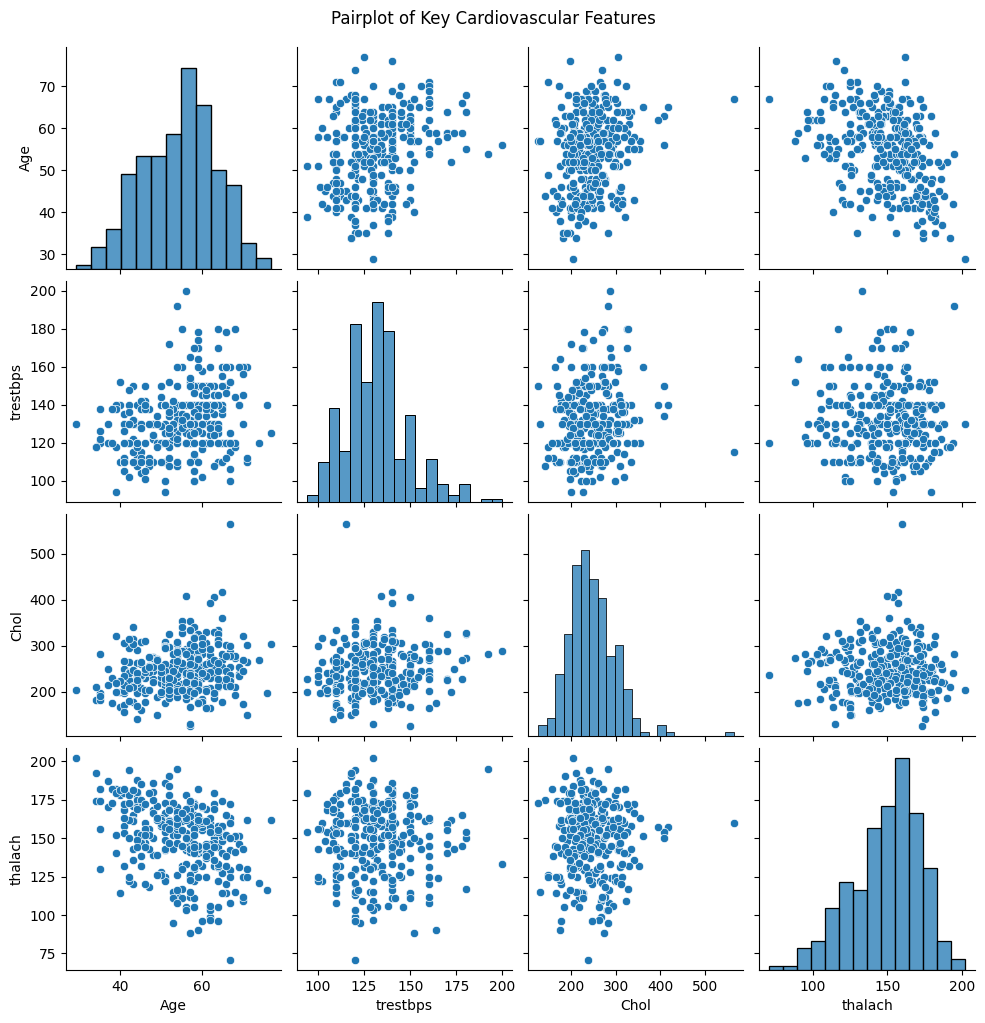

In [7]:
# Pairplot for Numerical Features
num_features = ['Age', 'trestbps', 'Chol', 'thalach']
sns.pairplot(heart[num_features])
plt.suptitle('Pairplot of Key Cardiovascular Features', y=1.02)
plt.show()

# Data cleaning and preparation

### Handling Missing Values

In [8]:
#Check for the number of missing values in data frame
heart.isnull().sum() 

Age         0
Sex         0
CP          0
trestbps    0
Chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Make Response Variable Binary

###### Condition: Values greater than 0 and less than 5 seclected for transformation
- If the condition is met, the value is set to 1; otherwise, it remains unchanged.

In [9]:
heart['num'] = np.where((heart['num'] > 0) & (heart['num'] < 5), 1, heart['num'])

# Print frequency table of num
print(heart['num'].value_counts())

0    164
1    139
Name: num, dtype: int64


### Feature and Response Variable Data Type Conversion

In [10]:
# Each feature is converted to the appropriate data type 'float'
heart['Age'] = heart['Age'].astype('float')
heart['Sex'] = heart['Sex'].astype('float')
heart['CP'] = heart['CP'].astype('float')
heart['trestbps'] = heart['trestbps'].astype('float')
heart['Chol'] = heart['Chol'].astype('float')
heart['fbs'] = heart['fbs'].astype('float')
heart['restecg'] = heart['restecg'].astype('float')
heart['thalach'] = heart['thalach'].astype('float')
heart['exang'] = heart['exang'].astype('float')
heart['oldpeak'] = heart['oldpeak'].astype('float')
heart['slope'] = heart['slope'].astype('float')
heart['ca'] = heart['ca'].astype('float')
heart['thal'] = heart['thal'].astype('float')

# Convert the response variable 
heart['num'] = heart['num'].astype('category')

In [11]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Age       303 non-null    float64 
 1   Sex       303 non-null    float64 
 2   CP        303 non-null    float64 
 3   trestbps  303 non-null    float64 
 4   Chol      303 non-null    float64 
 5   fbs       303 non-null    float64 
 6   restecg   303 non-null    float64 
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    float64 
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    float64 
 11  ca        303 non-null    float64 
 12  thal      303 non-null    float64 
 13  num       303 non-null    category
dtypes: category(1), float64(13)
memory usage: 31.3 KB
None


# Data Normalization

Normalization ensures that all features are on a similar scale, preventing certain features from dominating the model due to their magnitude. The normalization function is applied to specific columns in the dataset.
- Scales values between 0 and 1

In [12]:
def normalize(x):
    return ((x - x.min()) / (x.max() - x.min()))

# Test normalization function (should output the same result)
print(normalize(pd.Series([1, 2, 3, 4, 5])))
print(normalize(pd.Series([10, 20, 30, 40, 50])))

# Apply normalize function to data
cols_to_normalize = ['Age', 'Sex', 'CP', 'trestbps', 'Chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
heart[cols_to_normalize] = heart[cols_to_normalize].apply(normalize)

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64
0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64


In [13]:
# Check the data frame as of now
print(heart.describe())

              Age         Sex          CP    trestbps        Chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.529978    0.679868    0.719472    0.355564    0.275555    0.148515   
std      0.188305    0.467299    0.320042    0.166035    0.118212    0.356198   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.395833    0.000000    0.666667    0.245283    0.194064    0.000000   
50%      0.562500    1.000000    0.666667    0.339623    0.262557    0.000000   
75%      0.666667    1.000000    1.000000    0.433962    0.340183    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.495050    0.600055    0.326733    0.167678    0.300330    0.228823   
std      0.497486    0.1746

# Data splicing

### Splitting the Data
- Separates features (X) and the target variable (Y)
- Splits the data into training and testing sets using train_test_split
- 80% of the data is used for training, and 20% is reserved for testing

In [14]:
X = heart.drop('num', axis=1)  
y = heart['num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

### Dimension Check
Printing the dimensions of the split data helps verify that the split was done correctly.

In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 13)
y_train shape: (242,)
X_test shape: (61, 13)
y_test shape: (61,)


In [16]:
# Kernel Selection
kernels = ['Linear', 'RBF', 'Sigmoid']

# Create svm classifier
def getClassifier(ktype, C_val, gamma_val):
    if ktype == 0:
        # Linear kernel
        return SVC(kernel='linear', C=C_val)
    
    elif ktype == 1:
        # RBF kernel
        return SVC(kernel='rbf', gamma=gamma_val, C=C_val)
    
    elif ktype == 2:
        # Sigmoid kernel
        return SVC(kernel='sigmoid', gamma=gamma_val, C=C_val)

# Set the gamma
gamma_val = 0.1  

# Initialize a list to store results
results = []

for i in range(3):  
    # Set cost values
    if i == 0:
        C_vals = [0.5]
    elif i == 1:
        C_vals = [0.5]
    else:
        C_vals = [0.5]
    
    for C_val in C_vals:
        
        # Separate data into test and training sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
        
        # Train a SVC model using different kernel and C values, and train using training sets
        svclassifier = getClassifier(i, C_val, gamma_val) 
        svclassifier.fit(X_train, y_train)
        
        # Make predictions on the test dataset
        y_pred = svclassifier.predict(X_test)
        
        # Calculate accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        
        # Add result to the list
        results.append([kernels[i], C_val, accuracy])

# Convert results to a DataFrame and display as a table
df = pd.DataFrame(results, columns=['Kernel', 'C Value', 'Accuracy'])
print(df)


    Kernel  C Value  Accuracy
0   Linear      0.5  0.868852
1      RBF      0.5  0.836066
2  Sigmoid      0.5  0.852459


# Model Evaluation Results

The Linear Kernel performed better in this context, yielding the highest accuracy among the tested configurations (86.89%). If the dataset exhibits more linear separability, a Linear Kernel is likely to perform well.